# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [1]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/tkMeitner/Percolation.jl")
using Percolation

# Nearest Neighbor

First we make N by N lattice. Then we open each site with probability p and occupied with probability 1-p.

In [3]:
# N: lattice size
# p: occupied probability
N = 10; p = 0.6
square = squarenn(N, p)

Percolation.squarenn(10,0.6,[1 1 … 1 1; 1 0 … 1 1; … ; 1 0 … 1 0; 0 1 … 0 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

To visualize initial condition, type following code.
The white, blue and red sites correspond to open, water and block sites, respectively.
We assume the top of this lattice contacts with water and it permeates the lattice gradually.
If a nearest neighbor site of a water site is open, the open site becomes water site.

We define "percolation" such that at least one path connected between top and bottom exists.
To check whether percolation occurs or not, use percolation function.
percolation function returns a value 0 or 1.
The first value represents if percolation occurs or not. 0 is not percolating and 1 is percolating.

In [4]:
percolation(square)
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

0

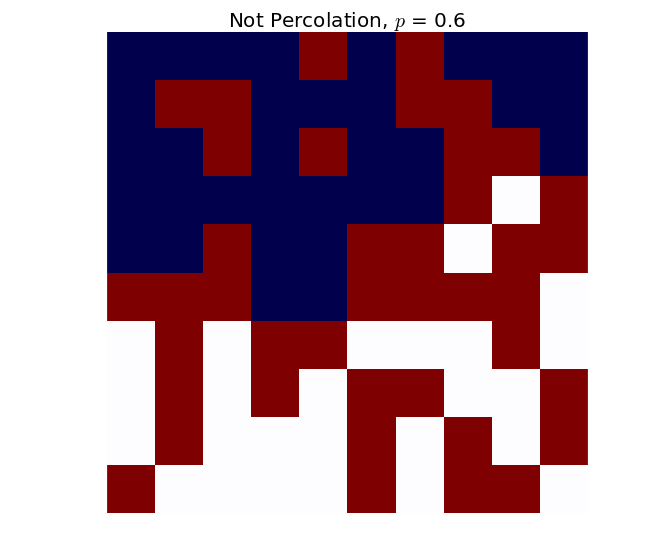

In [5]:
percolationplot(square)

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

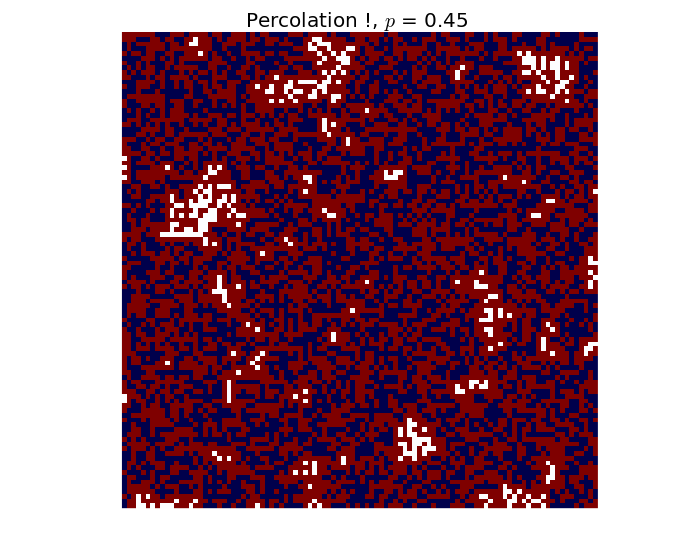

In [6]:
N = 100; p = 0.45
site = squarennn(N, p)
percolation(site)
percolationplot(site)

# GIF animation

To make gif animation, use percolationgif function.

In [ ]:
N = 100; p = 0.6;
site = squarenn(N, p) # or squarennn(N, p)
percolationgif(site)

# Triangular lattice

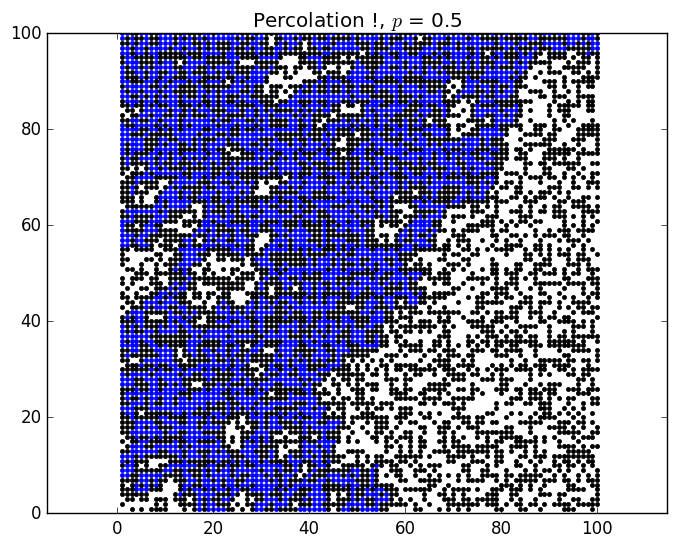

In [20]:
N = 100; p = 0.5;
tri = trinn(N, p);
percolation(tri)
percolationplot(tri)

# Honeycomb lattice

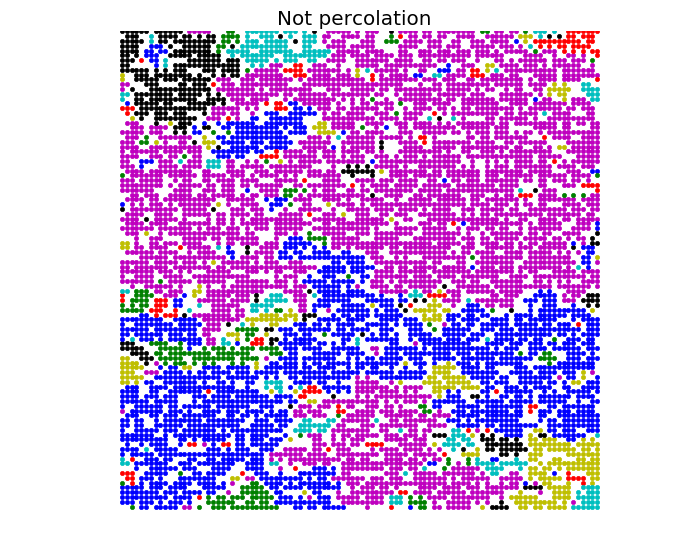

In [9]:
site = honeycomb(100, 0.7); cluster(site); clusterplot(site);

# Kagome lattice

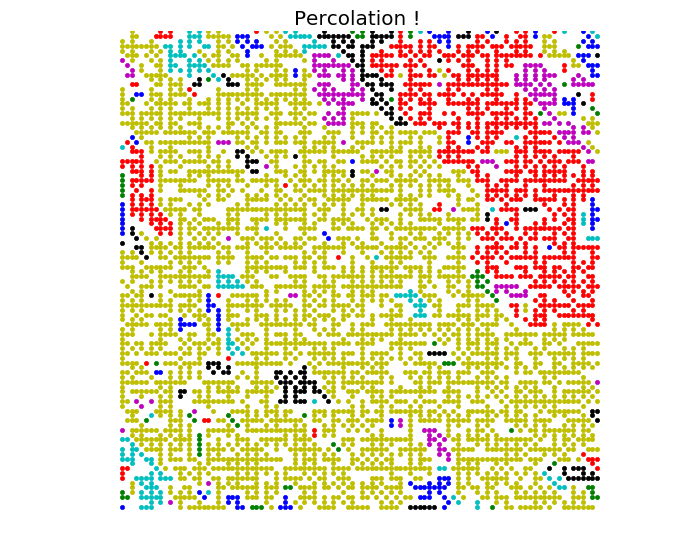

In [10]:
site = kagome(100, 0.65); cluster(site); clusterplot(site);

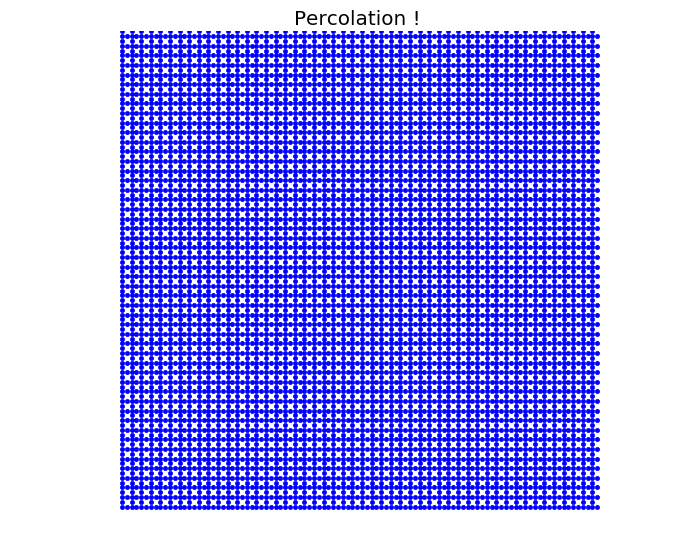

In [11]:
site = kagome(100, 1.0); cluster(site); clusterplot(site);

# d dimensional simple lattice

In [12]:
N = 100; dim = 3; p = 0.4;
simple = simplenn(N, dim, p);
@time percolation(simple)

 37.245616 seconds (61.88 M allocations: 1.940 GB, 1.69% gc time)


1

# Percolating probability

In [3]:
using PyPlot

## square lattice, nearest neighbor

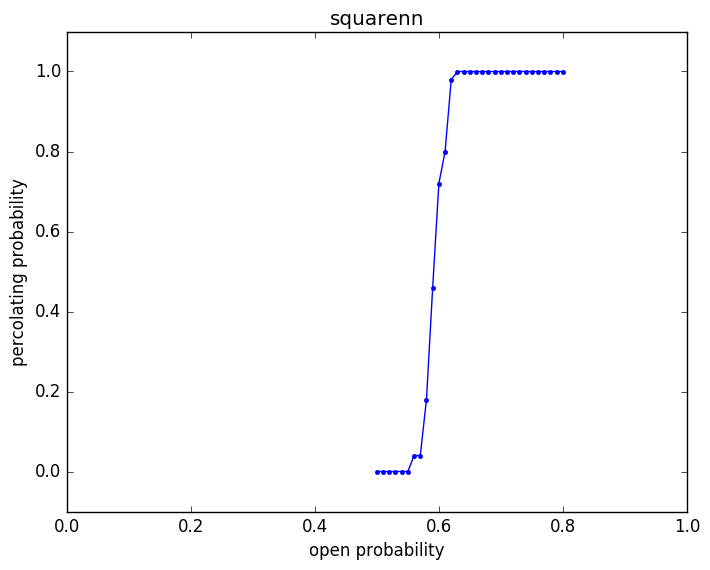

  5.760467 seconds (31.56 M allocations: 2.445 GB, 6.83% gc time)


In [24]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

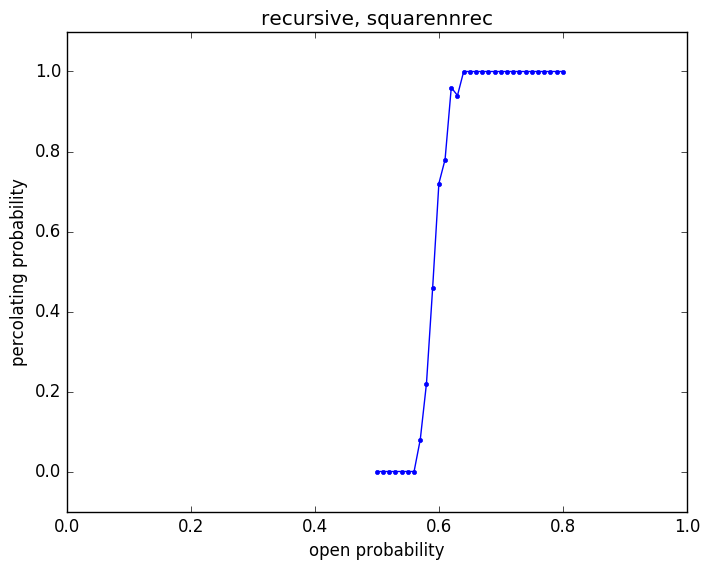

 16.467732 seconds (61.73 M allocations: 4.182 GB, 5.25% gc time)


In [25]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += cluster(square)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("recursive, squarennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square lattice, next nearest neighbor

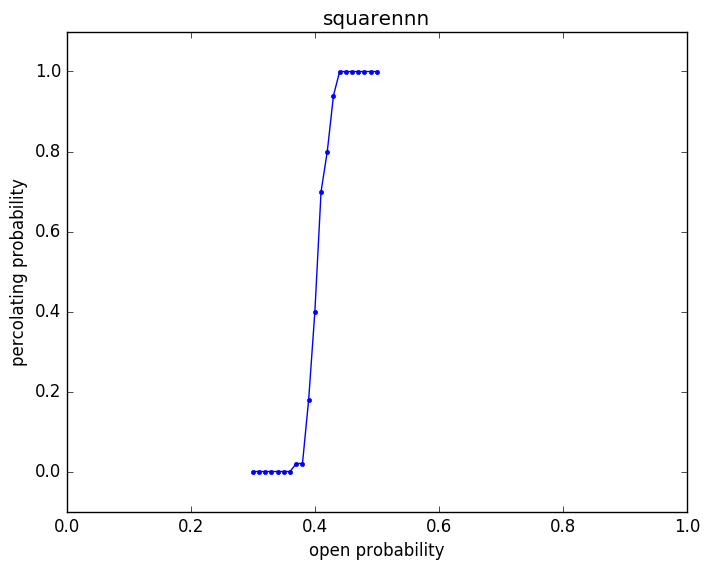

  2.749342 seconds (12.63 M allocations: 1.082 GB, 7.07% gc time)


In [31]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

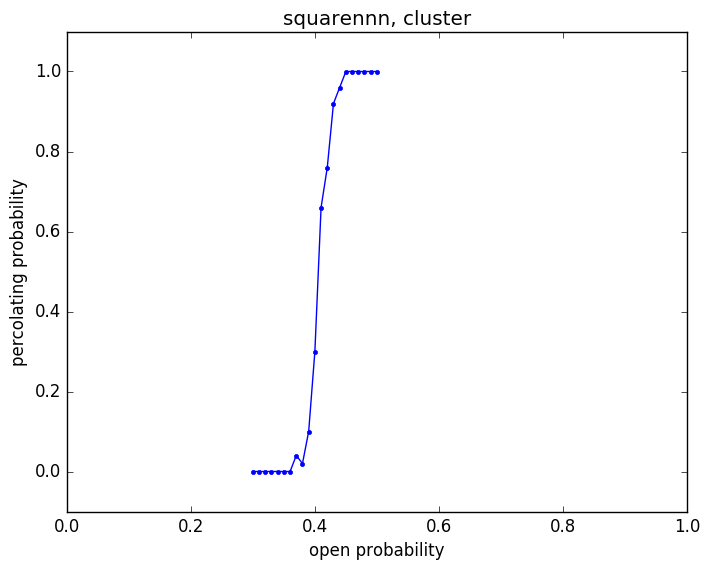

 47.637604 seconds (92.48 M allocations: 97.115 GB, 21.26% gc time)


In [36]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += cluster(square)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("squarennn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

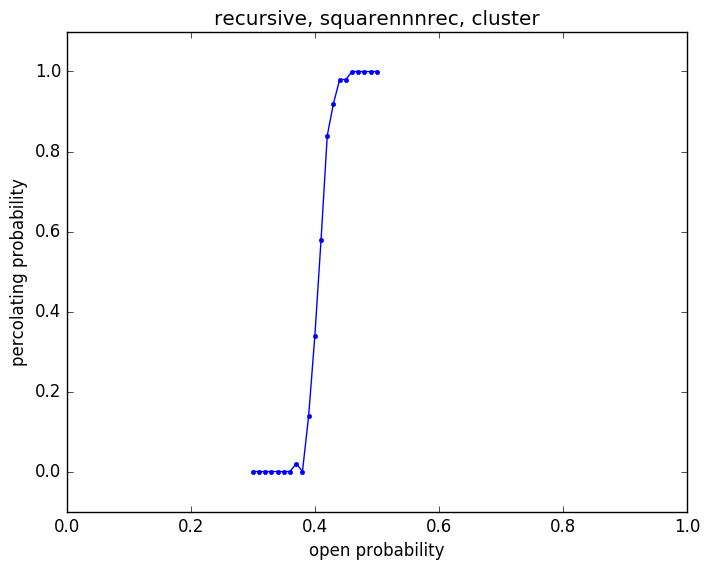

 11.439163 seconds (47.42 M allocations: 2.950 GB, 5.59% gc time)


In [34]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += cluster(square)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("recursive, squarennnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## triangular lattice

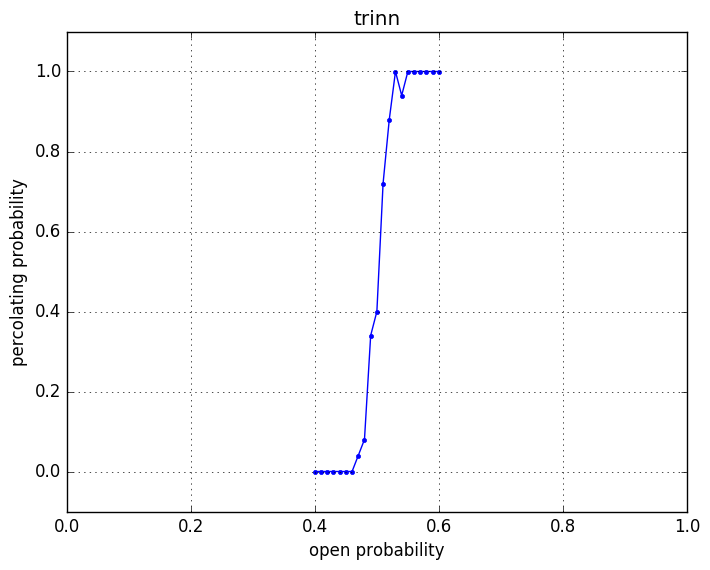

  4.068309 seconds (27.19 M allocations: 2.023 GB, 8.97% gc time)


In [33]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

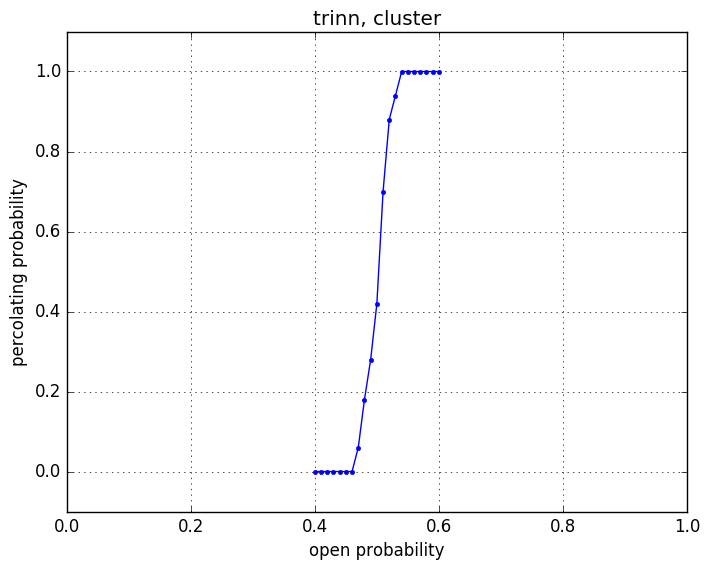

 55.575302 seconds (107.68 M allocations: 114.327 GB, 22.30% gc time)


In [37]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += cluster(square)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

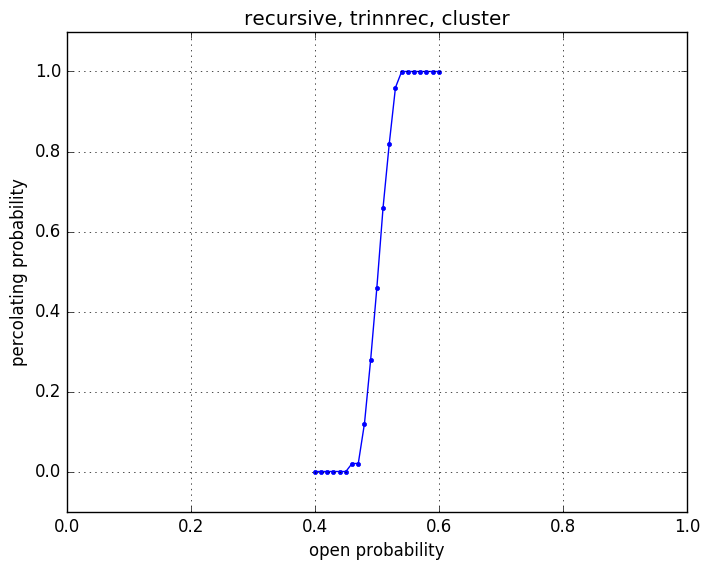

 12.358083 seconds (45.84 M allocations: 3.037 GB, 5.81% gc time)


In [38]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinnrec(N, plist[i])
        hit[i] += cluster(square)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("recursive, trinnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## simple lattice

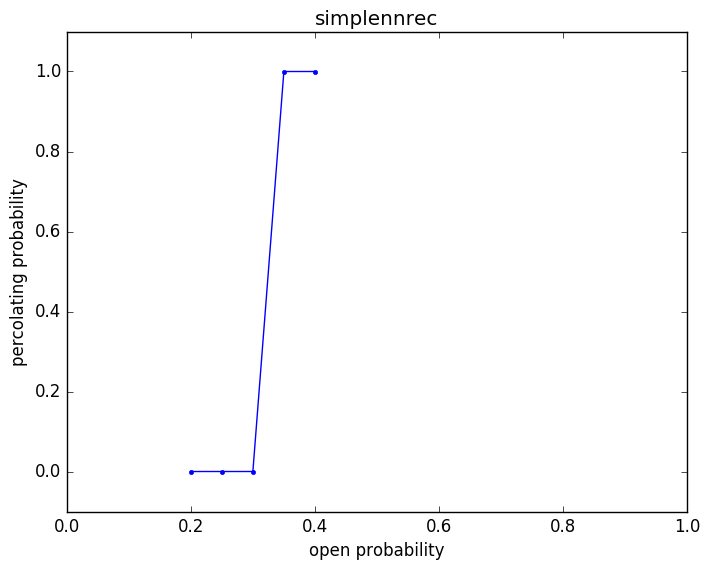

255.305024 seconds (419.04 M allocations: 13.637 GB, 1.55% gc time)


In [43]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 50; trial = 30; dim = 3
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("simplennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## honeycomb lattice

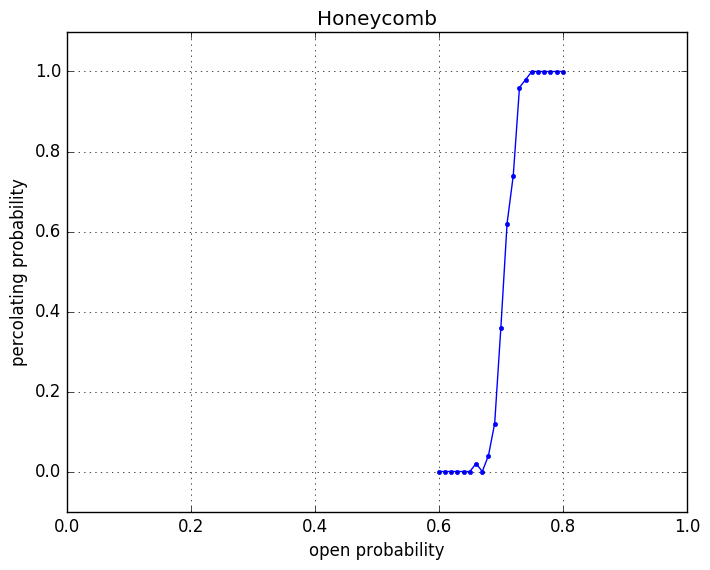

  9.466363 seconds (25.50 M allocations: 16.302 GB, 20.86% gc time)


In [18]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

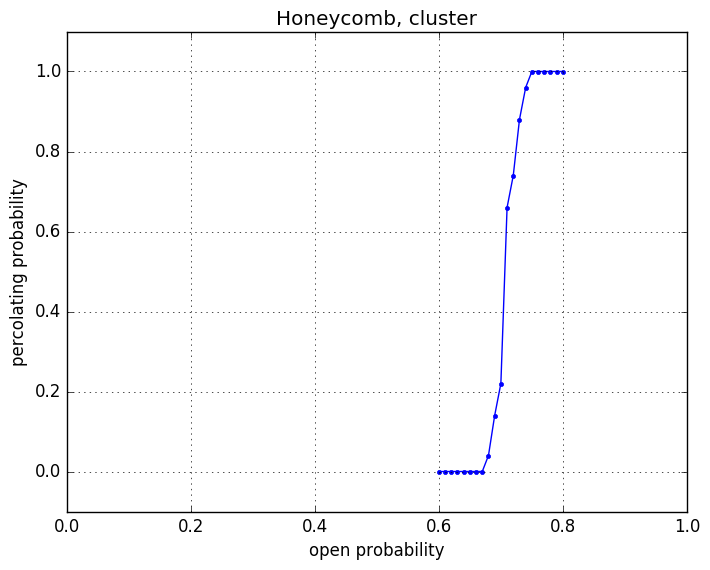

 46.822272 seconds (109.52 M allocations: 71.942 GB, 20.94% gc time)


In [39]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
grid("on")
title("Honeycomb, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## Kagome lattice

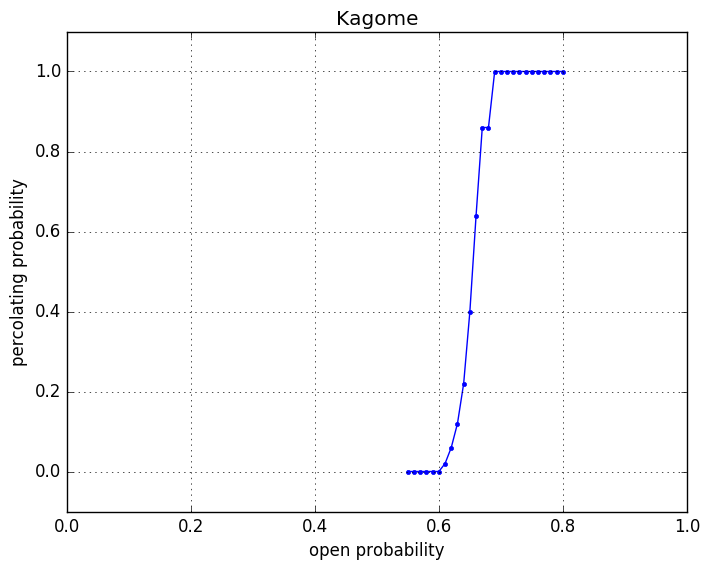

 16.971654 seconds (34.34 M allocations: 31.027 GB, 22.30% gc time)


In [9]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("Kagome")
grid("on")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

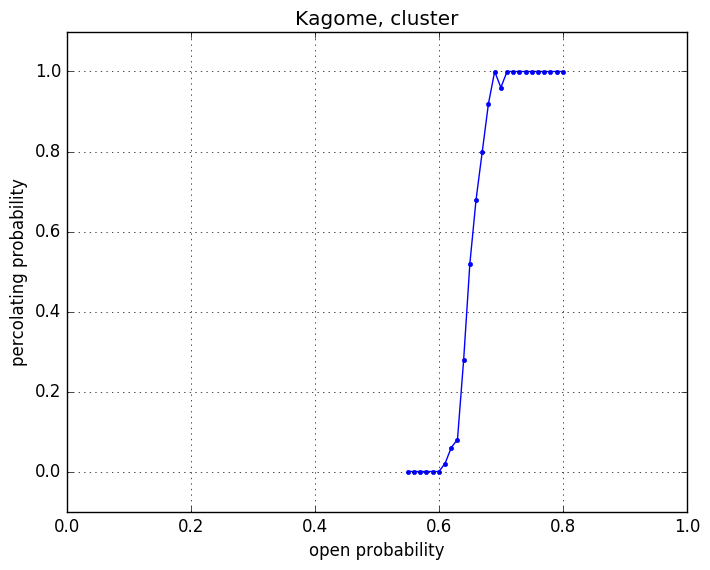

 62.812561 seconds (120.30 M allocations: 122.889 GB, 23.23% gc time)


In [40]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
title("Kagome, cluster")
grid("on")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

# Clustering

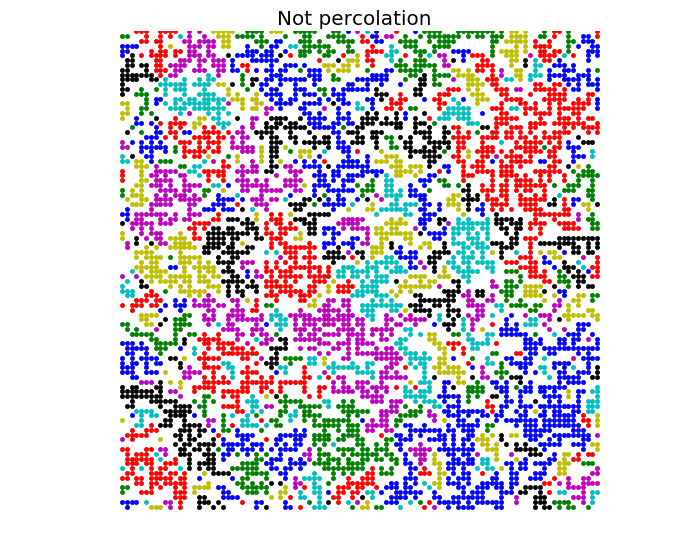

In [18]:
site = squarennrec(100, 0.5); cluster(site); clusterplot(site);

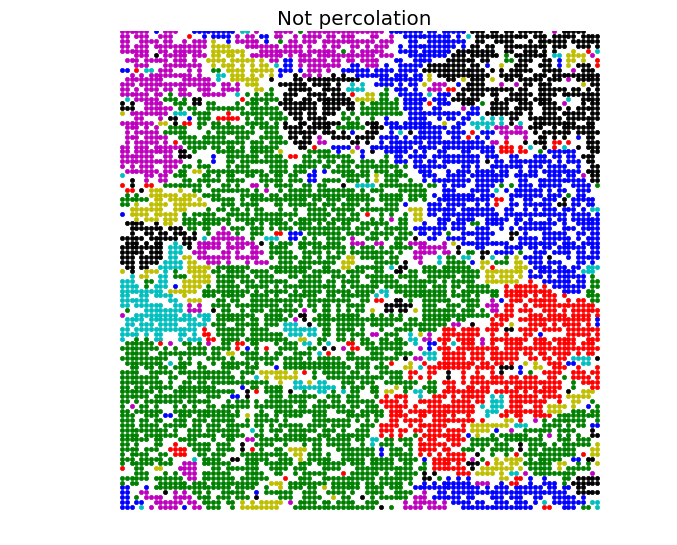

In [19]:
site = honeycomb(100, 0.7); cluster(site); clusterplot(site);